## Custom Dataset 

In [1]:
import torch
import torch.nn.functional as F

import numpy as np

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [2]:
class MyDataset(torch.utils.data.Dataset): 
    def __init__(self, x_data, y_data):
        self.x_data = x_data
        self.y_data = y_data
        
    def __len__(self):
         return len(self.y_data)

    def __getitem__(self, idx): 
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [3]:
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1*np.power(data_x,2) + 0.5*np.random.randn(100,1)

In [4]:
dataset = MyDataset(data_x, data_y)

dataloader = DataLoader(dataset, batch_size=2, shuffle=True)

In [5]:
model = torch.nn.Linear(1,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [6]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        prediction = model(x_train)

        # cost 계산
        cost = F.mse_loss(prediction, y_train)

        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
            epoch, nb_epochs, batch_idx+1, len(dataloader),
            cost.item()
            ))

Epoch    0/20 Batch 1/50 Cost: 5.960624
Epoch    0/20 Batch 2/50 Cost: 165.991394
Epoch    0/20 Batch 3/50 Cost: 120.948532
Epoch    0/20 Batch 4/50 Cost: 88.624161
Epoch    0/20 Batch 5/50 Cost: 185.998657
Epoch    0/20 Batch 6/50 Cost: 100.401978
Epoch    0/20 Batch 7/50 Cost: 98.830994
Epoch    0/20 Batch 8/50 Cost: 102.379410
Epoch    0/20 Batch 9/50 Cost: 79.148819
Epoch    0/20 Batch 10/50 Cost: 196.207718
Epoch    0/20 Batch 11/50 Cost: 5.094704
Epoch    0/20 Batch 12/50 Cost: 5.537705
Epoch    0/20 Batch 13/50 Cost: 3.590056
Epoch    0/20 Batch 14/50 Cost: 227.287537
Epoch    0/20 Batch 15/50 Cost: 7.529313
Epoch    0/20 Batch 16/50 Cost: 23.587584
Epoch    0/20 Batch 17/50 Cost: 86.945129
Epoch    0/20 Batch 18/50 Cost: 187.630798
Epoch    0/20 Batch 19/50 Cost: 119.816460
Epoch    0/20 Batch 20/50 Cost: 51.927982
Epoch    0/20 Batch 21/50 Cost: 115.292969
Epoch    0/20 Batch 22/50 Cost: 12.575369
Epoch    0/20 Batch 23/50 Cost: 36.628864
Epoch    0/20 Batch 24/50 Cost: 29.043

## Image to Tensor

![title](flag.png)


In [7]:
from PIL import Image
import numpy as np
import os

os.getcwd()

'/content'

In [8]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


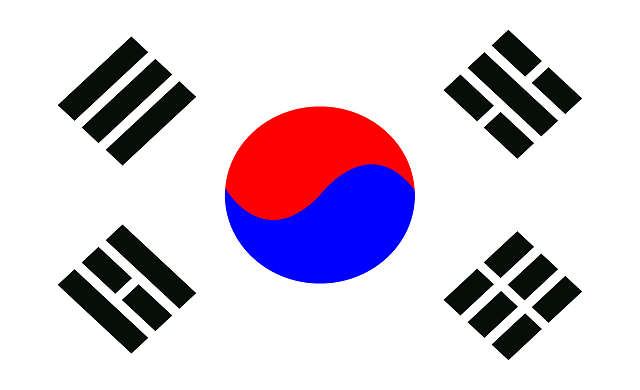

In [9]:
img = Image.open('/content/drive/MyDrive/Colab Notebooks/lecture-note-python-basics-for-ai/codes/pytorch/01_mlp/dataset/flag.png')
img

In [10]:
np_img_array = np.array(img.getdata())
np_img_array.shape

(249600, 4)

In [11]:
from torchvision import transforms as transforms

result = transforms.ToTensor()(img)

In [12]:
result.shape

torch.Size([4, 390, 640])

In [13]:
img_array = transforms.ToPILImage()(result).convert("RGB")
img_array.size

(640, 390)

In [14]:
type(img_array)

PIL.Image.Image

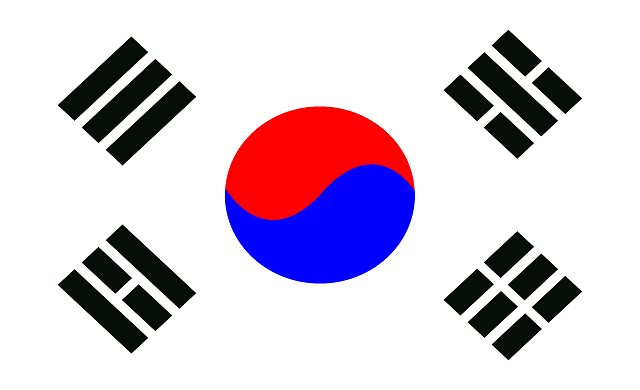

In [15]:
img_array

## MNIST 

In [16]:
!wget http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz

--2021-02-01 15:21:47--  http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
Resolving yann.lecun.com (yann.lecun.com)... 172.67.171.76, 104.21.29.36, 2606:4700:3034::6815:1d24, ...
Connecting to yann.lecun.com (yann.lecun.com)|172.67.171.76|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M  4.90MB/s    in 1.9s    

2021-02-01 15:21:49 (4.90 MB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]



In [17]:
!gunzip /content/train-images-idx3-ubyte.gz

In [18]:
!pip3 uninstall idx2numpy
!pip3 install idx2numpy

  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-cp36-none-any.whl size=7905 sha256=cee77b65f027d28088427dc458763b813b8ddc440b7555c3f5b3cf16f2a928ef
  Stored in directory: /root/.cache/pip/wheels/7a/c1/da/284ce80a748fab898b8d1fa95468a386e7cf3b81da18511f9d
Successfully built idx2numpy


In [19]:
import idx2numpy
import numpy as np

file = 'train-images-idx3-ubyte'
arr = idx2numpy.convert_from_file(file)

In [20]:
arr.shape

(60000, 28, 28)

In [21]:
arr

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 